# SID resolution manipulations

In [ ]:
import starepandas
import geopandas
import matplotlib.pyplot as plt
from shapely.wkt import loads

In [2]:
sids = [2299437706637111721, 2299435211084507593, 2299566194809236969]
sdf = starepandas.STAREDataFrame(sids=sids)        

## Change resolutions

In [4]:
sdf.to_sids_level(level=6, clear_to_level=False)

,sids
0,2299437706637111718
1,2299435211084507590
2,2299566194809236966


## Clear Resolution

In [5]:
sdf.clear_to_level(inplace=False)

,sids
0,2299437254470270985
1,2299435055447015433
2,2299564797819093001


## To single resolution

In [ ]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = {
    'pop_est': [83132799.0],
    'continent': ['Europe'],
    'name': ['Germany'],
    'iso_a3': ['DEU'],
    'gdp_md_est': [3861123],
    'geometry': [
        # Germany
        "POLYGON ((14.11968631354256 53.75702912049104, 14.35331546393414 53.24817129171297, 14.07452111171943 52.98126251892535, 14.4375997250022 52.62485016540839, 14.68502648281569 52.0899474147552, 14.60709842291953 51.74518809671997, 15.01699588385867 51.10667409932158, 14.57071821458607 51.00233938252428, 14.30701338060064 51.11726776794141, 14.05622765468817 50.9269176295943, 13.33813195156029 50.73323436136435, 12.96683678554319 50.48407644306909, 12.24011111822256 50.26633779560728, 12.41519087082744 49.96912079528057, 12.52102420416119 49.54741526956273, 13.03132897304343 49.30706818297324, 13.59594567226444 48.87717194273715, 13.243357374737 48.41611481382905, 12.88410281744387 48.28914581968786, 13.02585127122049 47.63758352313583, 12.93262698736595 47.467645575544, 12.62075971848449 47.67238760028441, 12.14135745611279 47.70308340106578, 11.42641401535474 47.52376618101297, 10.5445040218616 47.5663992376538, 10.40208377446521 47.30248769793916, 9.89606814946319 47.5801968450757, 9.59422610844635 47.52505809182027, 8.522611932009767 47.83082754169129, 8.317301466514095 47.61357982033627, 7.466759067422231 47.62058197691181, 7.593676385131062 48.33301911070372, 8.099278598674744 49.01778351500333, 6.658229607783568 49.20195831969157, 6.186320428094177 49.46380280211451, 6.242751092156993 49.90222565367873, 6.043073357781111 50.12805166279423, 6.15665815595878 50.80372101501058, 5.988658074577813 51.85161570902505, 6.589396599970826 51.85202912048339, 6.842869500362383 52.22844025329755, 7.092053256873896 53.14404328064489, 6.905139601274129 53.48216217713065, 7.100424838905269 53.69393219666267, 7.936239454793963 53.74829580343379, 8.121706170289485 53.52779246684429, 8.800734490604668 54.0207856309089, 8.572117954145369 54.39564647075406, 8.526229282270208 54.96274363872516, 9.282048780971138 54.83086538351618, 9.921906365609118 54.98310415304803, 9.9395797054529 54.59664195415326, 10.95011233892052 54.36360708273315, 10.93946699386845 54.00869334575259, 11.95625247564328 54.19648550070116, 12.51844038254671 54.470370591848, 13.6474670752595 54.0755109727059, 14.11968631354256 53.75702912049104))",
    ]
}
world["geometry"] = [loads(wkt) for wkt in world["geometry"]]
world = geopandas.GeoDataFrame(world, crs="EPSG:4326")

europe  = world[world.continent=='Europe']
europe = starepandas.STAREDataFrame(europe, add_sids=True, level=7, add_trixels=True)

/tmp/ipykernel_47321/3598604040.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [9]:
europe2 = europe.to_sids_singlelevel()
trixels = europe2.make_trixels()
europe2.set_trixels(trixels, inplace=True)

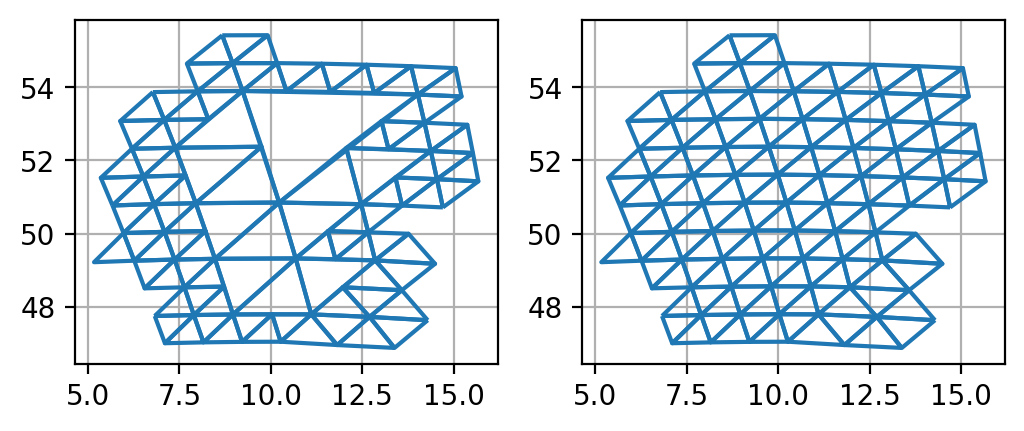

In [10]:
fig, ax = plt.subplots(1, 2, dpi=200, figsize=(6,6))
ax[0].grid(True)
ax[1].grid(True)
            
europe[europe.name=='Germany'].plot(ax=ax[0], trixels=True)
europe2[europe2.name=='Germany'].plot(ax=ax[1], trixels=True)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

In [11]:
len(europe2.sids.iloc[0])

4519

In [12]:
europe['sids'].dtype

dtype('O')

## Midwest example

In [13]:
regions = geopandas.read_file('../tests/data/cb_2019_us_region_5m.zip')
regions = starepandas.STAREDataFrame(regions)
region_sids = regions.make_sids(level=7, convex=False)
regions.set_sids(region_sids, inplace=True)
midwest = regions[regions['NAME']=='Midwest']
trixels = midwest.make_trixels()
midwest = midwest.set_trixels(trixels)

<Axes: >

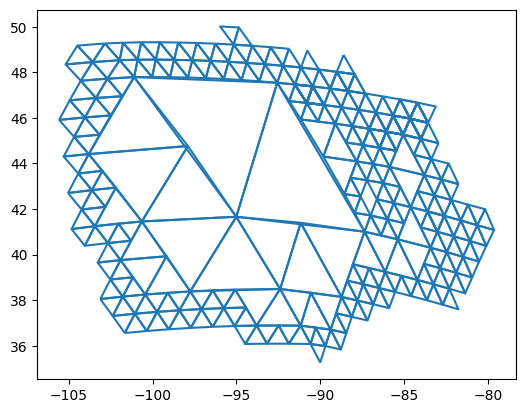

In [14]:
midwest.plot()

<Axes: >

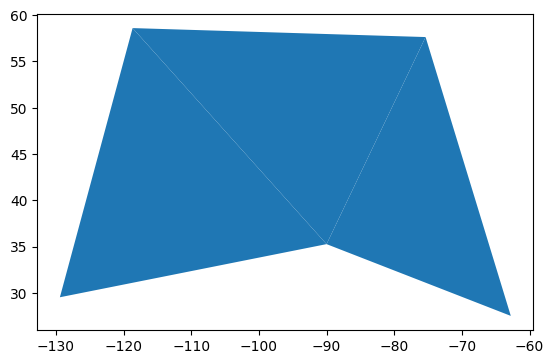

In [15]:
midwest.to_sids_singlelevel(2).make_trixels().plot()